In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import matplotlib.pyplot as plt
from maps.basic_map import BasicMap
from scenario import Scenario
from person.random_walk_lost_person import RandomWalkLostPerson
from person.finite_horizon_searcher import best_path
from person.finite_horizon_search_party import best_multipath
from person.distribution import GridDistribution

In [2]:
N = 15
start = (7, 7)

In [3]:
grid = BasicMap(N, N)
walker = RandomWalkLostPerson(grid)
walker.init(start)

In [4]:
dist = GridDistribution(walker, grid, 100)
dist.run()

In [5]:
%timeit best_path(start, 20, 8, dist)

112 ns ± 3.06 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [6]:
paths = []
for _ in range(8):
    paths.append(tuple(best_multipath(start, 20, 8, dist, tuple(paths))))

In [7]:
paths

[(((7, 6), 0.03),
  ((6, 6), 0.03),
  ((7, 6), 0.04),
  ((7, 7), 0.03),
  ((7, 8), 0.02666666666666667),
  ((7, 8), 0.03333333333333333),
  ((7, 9), 0.03),
  ((8, 9), 0.02666666666666667)),
 (((7, 8), 0.03333333333333333),
  ((7, 8), 0.03),
  ((7, 9), 0.03333333333333333),
  ((7, 9), 0.03333333333333333),
  ((8, 9), 0.03333333333333333),
  ((8, 9), 0.02),
  ((8, 8), 0.02),
  ((7, 8), 0.016666666666666666)),
 (((8, 7), 0.016666666666666666),
  ((8, 6), 0.013333333333333334),
  ((8, 5), 0.023333333333333334),
  ((7, 5), 0.02666666666666667),
  ((7, 5), 0.023333333333333334),
  ((6, 5), 0.023333333333333334),
  ((7, 5), 0.03666666666666667),
  ((7, 4), 0.03)),
 (((6, 7), 0.023333333333333334),
  ((5, 7), 0.01),
  ((5, 8), 0.02),
  ((5, 9), 0.023333333333333334),
  ((5, 8), 0.016666666666666666),
  ((4, 8), 0.016666666666666666),
  ((4, 7), 0.02),
  ((4, 7), 0.023333333333333334)),
 (((8, 7), 0.0),
  ((9, 7), 0.02),
  ((9, 6), 0.02),
  ((9, 7), 0.03),
  ((9, 6), 0.02),
  ((9, 5), 0.0166666

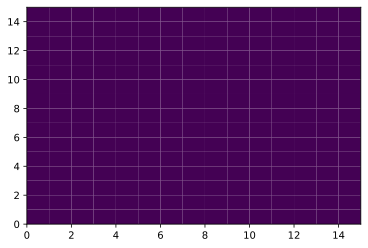

In [18]:
x = np.zeros((15, 15))
plt.pcolormesh(x)
plt.show()